In [1]:
#Importing modules to use
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from matplotlib.cm import get_cmap
from google.colab import drive
import os
import pandas

drive.mount('/content/drive')
path = '/content/drive/My Drive/fortran/' #Path where data file is stored
os.chdir(path);

Mounted at /content/drive


In [2]:
plt.rcdefaults() #Restore the rc params to default

#Customize properties of the plots
plt.style.use('dark_background')
plt.rc('font', size = 12)
plt.rc('axes', titlesize = 10)
plt.rc('xtick', labelsize = 10)
plt.rc('ytick', labelsize = 10)
plt.rc('legend', fontsize = 11)

plt.rcParams['lines.markersize'] = 12
plt.rcParams['legend.edgecolor'] = 'none'
plt.rcParams['axes.formatter.use_mathtext'] = True

In [3]:
#Path to the data file
dataFile = 'time.dat'

# Reading data file
data = pandas.read_csv(dataFile, sep = '\s+', skiprows = 2)

#Extracting time and particle values from data file
t_ex1 = data['t_ex1']
t_barnes = data['t_barnes']
t_parallel = data['t_parallelized']
particle = data['Particles']

<ipython-input-23-e2af7ee68b0a>:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = get_cmap('PiYG_r')  # Color map for the plots


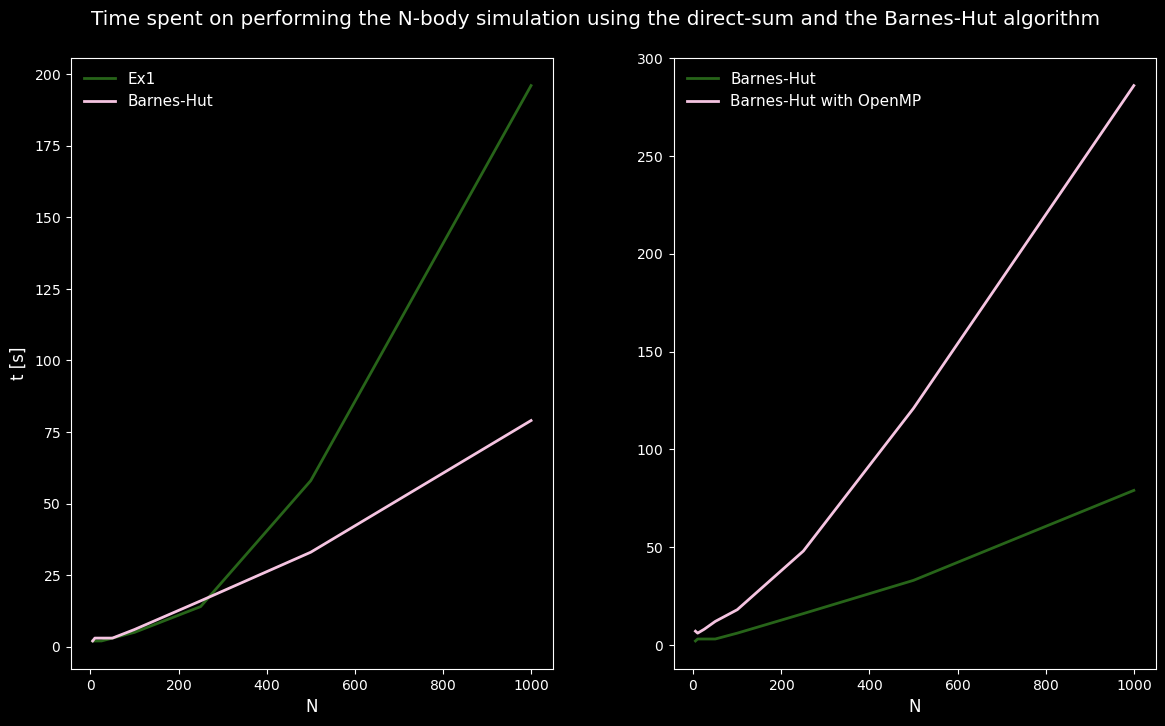

In [23]:
cmap = get_cmap('PiYG_r')  # Color map for the plots
colors = cmap(np.linspace(0, 1, 4)) #Colors from the color map to use in the plots

#Set different values for plotting the orders of the algorithms
alpha = 0.8 #Transparency
lw = 2 #Line width
ls = '-.' #Linestyle

size_ex1 = np.size(t_ex1) #Size of the time spent on the direct-sum algorithm array

#Plot the time spent on performing the N-body simulation for the different algorithms
plt.figure(figsize=(14, 16))

#Plot the time spent for the direct-sum and the Barnes-Hut algorithm
plt.subplot(221)
plt.plot(particle, t_ex1, label='Ex1', color=colors[0], lw=lw) #Direct-sum algorithm used in exercise 1

plt.plot(particle, t_barnes, label='Barnes-Hut', color=colors[2], lw=lw) #Barnes-Hut algorithm

plt.xlabel('N')
plt.ylabel('t [s]')
plt.legend(loc='upper left')

#Plot the time spent for the Barnes-Hut algorithm with and without parallelization with OpenMP
plt.subplot(222)
plt.plot(particle, t_barnes, label='Barnes-Hut', color=colors[0], lw=lw) #Non-parallelized Barnes-Hut algorithm

plt.plot(particle, t_parallel, label='Barnes-Hut with OpenMP', color=colors[2], lw=lw) #Parallelized Barnes-Hut algorithm

plt.xlabel('N')
plt.legend(loc='upper left')

plt.suptitle('Time spent on performing the N-body simulation using the direct-sum and the Barnes-Hut algorithm')

plt.subplots_adjust(wspace = 0.25, top = 0.95)
plt.show()

This plot shows the time spent on performing the N-body simulation using the direct-sum and the Barnes-Hut algorithm for various sets of particles ($N$). The simulations have been carried out on a 4-cores computer with a time step of $dt = 0.01$, an output time step of $dt_{out} = 0.1$ and a final time of $t_{final} = 50$. For the Barnes-Hut algorithm, the $\theta$ parameter was adjusted based on the number of particles, with smaller values used for fewer particles to have more accurate results. The direct-sum algorithm implemented in exercise 1 is of order $O(N^2)$, while the Barnes-Hut algorithm is of order $O(N \ logN)$.

As shown in the left panel, the Barnes-Hut is much faster than the direct-sum one for a large number of particles. This is due to the way the forces between particles are calculated. However, if we have few particles, it's more efficient to use the direct-sum algorithm because the Barnes-Hut will take more time to perform the simulation as it has to build the tree and recursively computing the center of mass and total mass for each cell.

In the right panel,
we observe that the parallelized version of the Barnes-Hut algorithm takes more time to perform simulations with fewer than a thousand particles. We always expect the parallelization to be slower when we have small sets of particles as it introduces overhead that outweights its benefits. However, the CRITICAL directive that had to be used in the calculation of the forces to avoid race conditions, leads to slow down the code, as only one thread executes this block of code at a time. But, for simulations involving thousands of particles the parallelized code is expected to become computationally faster, as the benefits of parallel processing outweigh the initial overhead.


